正则化

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

from ex2.costFunctionReg import costFunctionReg
from ex2.mapFeature import mapFeature
from ex2.plotData import plotData
from ex2.plotDecisionBoundary import plotDecisionBoundary
from ex2.predict import predict

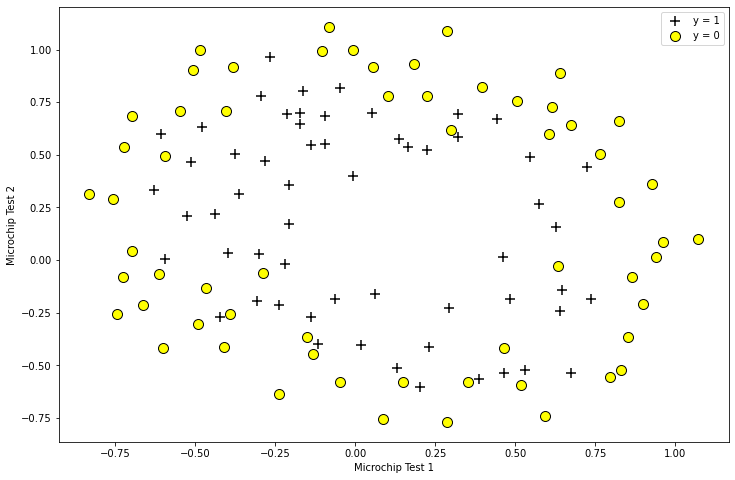

In [2]:
# Load Data
#  The first two columns contains the X values and the third column
#  contains the label (y).

data = pd.read_csv('ex2data2.txt', header=None)
X = np.array(data.iloc[:, 0:2])
y = np.array(data.iloc[:, 2]).reshape(-1, 1)

ax = plotData(X, y)

# Labels and Legend
h, _ = ax.get_legend_handles_labels()
ax.set_xlabel('Microchip Test 1')
ax.set_ylabel('Microchip Test 2')
# Specified in plot order
ax.legend(h, ['y = 1', 'y = 0'])

plt.show()

In [3]:
# =========== Part 1: Regularized Logistic Regression ============
#  In this part, you are given a dataset with data points that are not
#  linearly separable. However, you would still like to use logistic
#  regression to classify the data points.
#
#  To do so, you introduce more features to use -- in particular, you add
#  polynomial features to our data matrix (similar to polynomial
#  regression).
#

# Add Polynomial Features

# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
X = mapFeature(X[:, 0], X[:, 1])
X.shape

(118, 28)

In [4]:
# Initialize fitting parameters
initial_theta = np.zeros((1, X.shape[1]))
# 源码乱糟糟的，一下行向量一下列向量，干脆统一theta为行向量吧

# Set regularization parameter lambda to 1
_lambda = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X, y, _lambda)

print('Cost at initial theta (zeros): %.3f' % cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros) - first five values only:\n')
grad_list = grad[:, 0:5].tolist()[0]
print('  {:.4f} {:.4f} {:.4f} {:.4f} {:.4f}'.format(*list(grad_list)))
print('Expected gradients (approx) - first five values only:')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115')

# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones((1, X.shape[1]))
cost, grad = costFunctionReg(test_theta, X, y, 10)

print('\nCost at test theta (with lambda = 10): %.2f' % cost)
print('Expected cost (approx): 3.16')
print('Gradient at test theta - first five values only:')
grad_list = grad[:, 0:5].tolist()[0]
print('  {:.4f} {:.4f} {:.4f} {:.4f} {:.4f}'.format(*list(grad_list)))
print('Expected gradients (approx) - first five values only:')
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:



In [ ]:
# 函数分离
def costF(theta, X, y, _lambda):
    re, _ = costFunctionReg(theta, X, y, _lambda)
    return re


def gradF(theta, X, y, _lambda):
    _, re = costFunctionReg(theta, X, y, _lambda)
    return re


In [ ]:
# Initialize fitting parameters
initial_theta = np.zeros((1, X.shape[1])).reshape(1, -1)

# Set regularization parameter lambda to 1 (you should vary this)
_lambda = 1  # 0过拟合，100欠拟合

# Optimize

theta, _, _ = opt.fmin_tnc(func=costF, x0=initial_theta, fprime=gradF, args=(X, y, _lambda))

# Plot Boundary
ax = plotDecisionBoundary(theta, X, y)
plt.title('lambda = {:.2f}'.format(_lambda))

# Labels and Legend
ax.set_xlabel('Microchip Test 1')
ax.set_ylabel('Microchip Test 2')

h, _ = ax.get_legend_handles_labels()
ax.legend(h, ['y = 1', 'y = 0'])
# 这里我实在没办法为边界添加图例了...问题不大

# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: %.1f' % (np.mean(p == y) * 100))
print('Expected accuracy (with lambda = 1): 83.1 (approx)')